In [1]:
import torch

import numpy as np

import matplotlib.pyplot as plt

import skimage

tensor([[[[1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.]],

         [[1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.]],

         [[1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0

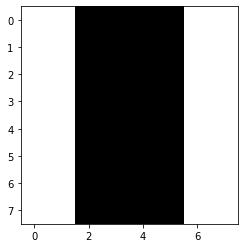

In [2]:
## Create a simple image 
X = torch.ones((1, 3, 8, 8))
X[:, :, :, 2:6] = 0
X[:, 1, :, :] = X[:, 1, :, :]

print(X)

plt.imshow(X[0].permute(1,2,0))

In [3]:
## Create the Kernel
kernels = torch.zeros(3,3,3)
kernel1 = torch.tensor([[1., 0., -1.],
                       [2., 0., -2.],
                       [1., 0., -1.]])

kernel2 =  torch.tensor([[1., 2., 1.],
                       [0., 0., 0.],
                       [-1., -2., -1.]])

kernel3 = torch.tensor([[0., 0., 0.],
                       [0., 1., 0.],
                       [0., 0., 0.]])

kernels[0], kernels[1], kernels[2] = kernel1, kernel2, kernel3
kernels_multi_features = kernels.view(1, 3, 3, 3)
print(kernels_multi_features)
print(kernels_multi_features.shape)

## Conv2D (cross-correlation operation)
# conv2d with each of kernl separately
out1 = torch.nn.functional.conv2d(X, kernels_multi_features, groups=1)
print(out1)
print(out1.shape)


tensor([[[[ 1.,  0., -1.],
          [ 2.,  0., -2.],
          [ 1.,  0., -1.]],

         [[ 1.,  2.,  1.],
          [ 0.,  0.,  0.],
          [-1., -2., -1.]],

         [[ 0.,  0.,  0.],
          [ 0.,  1.,  0.],
          [ 0.,  0.,  0.]]]])
torch.Size([1, 3, 3, 3])
tensor([[[[ 5.,  4.,  0.,  0., -4., -3.],
          [ 5.,  4.,  0.,  0., -4., -3.],
          [ 5.,  4.,  0.,  0., -4., -3.],
          [ 5.,  4.,  0.,  0., -4., -3.],
          [ 5.,  4.,  0.,  0., -4., -3.],
          [ 5.,  4.,  0.,  0., -4., -3.]]]])
torch.Size([1, 1, 6, 6])


In [4]:
## Also, filtering can be applied on each channel, individually
kernels_2 = kernels.view(3,1, 3, 3)
print("kernels_2 shape:",kernels_2)
out2 = torch.nn.functional.conv2d(X, kernels_2, groups=3)
print(out2)
print("Output 3 feature maps:",out2.shape)


kernels_2 shape: tensor([[[[ 1.,  0., -1.],
          [ 2.,  0., -2.],
          [ 1.,  0., -1.]]],


        [[[ 1.,  2.,  1.],
          [ 0.,  0.,  0.],
          [-1., -2., -1.]]],


        [[[ 0.,  0.,  0.],
          [ 0.,  1.,  0.],
          [ 0.,  0.,  0.]]]])
tensor([[[[ 4.,  4.,  0.,  0., -4., -4.],
          [ 4.,  4.,  0.,  0., -4., -4.],
          [ 4.,  4.,  0.,  0., -4., -4.],
          [ 4.,  4.,  0.,  0., -4., -4.],
          [ 4.,  4.,  0.,  0., -4., -4.],
          [ 4.,  4.,  0.,  0., -4., -4.]],

         [[ 0.,  0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.,  0.]],

         [[ 1.,  0.,  0.,  0.,  0.,  1.],
          [ 1.,  0.,  0.,  0.,  0.,  1.],
          [ 1.,  0.,  0.,  0.,  0.,  1.],
          [ 1.,  0.,  0.,  0.,  0.,  1.],
          [ 1.,  0.,  0.,  0.,  0.,  1.],
          [

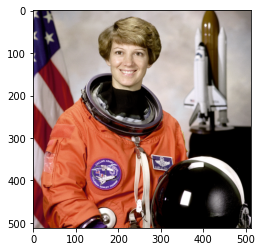

torch.Size([1, 3, 3, 3])
output shape:  torch.Size([1, 1, 510, 510])

  tensor([[[[ 0.3569, -0.4588, -1.2941,  ...,  0.4000,  0.4824,  0.5216],
          [ 0.2627, -0.2039, -0.6745,  ...,  0.4275,  0.4667,  0.4863],
          [ 0.4824,  0.2706, -0.0157,  ...,  0.4510,  0.4196,  0.4549],
          ...,
          [ 0.6941,  0.7569,  0.8118,  ...,  0.6392,  0.1294,  0.0039],
          [ 0.7451,  0.8275,  0.9529,  ...,  0.4039,  0.0078, -0.0039],
          [ 0.7569,  0.9098,  1.0078,  ...,  0.5725,  0.1686, -0.0039]]]])


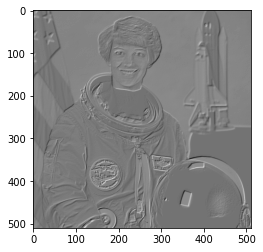

In [24]:
## Conv2D with a real image
def normalize_img(img):
    n_channel, H, W = img.shape[0], img.shape[1], img.shape[2]
    ## For each channel, flatten it
    img_flat = img.view(n_channel, H*W)
    
    ## Compute the max and min value for each channel
    channel_wise_min = img_flat.min(dim = 1, keepdim = True)[0]
    channel_wise_max = img_flat.max(dim = 1, keepdim = True)[0]
    
    ## Max-min normalization
    img_flat = img_flat - channel_wise_min
    img_flat = img_flat/channel_wise_max
    img_flat = img_flat.view(n_channel, H, W)
    
    return img_flat

img = skimage.data.astronaut()
img = torch.tensor(img).permute(2,0,1).float() # convert numpy to Tensor
img = normalize_img(img) # normalize the image
img = img.view(1, 3, 512, 512)

plt.imshow(img[0].permute(1,2,0))
plt.show()

## 2d-convolution. Convolution
print(kernels_multi_features.shape)
out_img = torch.nn.functional.conv2d(img, kernels_multi_features, groups=1)
print("output shape: ",out_img.shape)
print("\n ",out_img)

plt.imshow(out_img[0].permute(1, 2, 0), cmap = "gray")


Now, it will returns 3 feature maps:


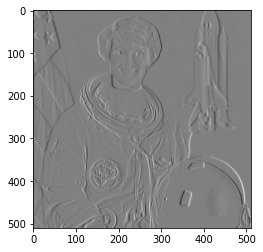

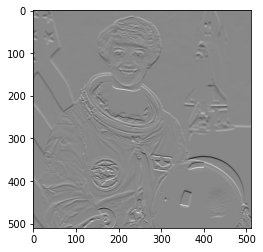

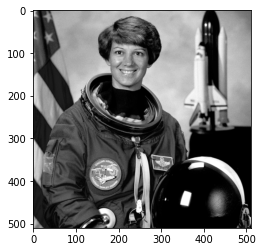

In [6]:
## 2d-convolution. Convolution of each filter, return separately
out_img2 = torch.nn.functional.conv2d(img, kernels_2, groups=3)

print("Now, it will returns 3 feature maps:")

for i in range(out_img2.shape[1]):
    plt.imshow(out_img2[0][i], cmap = "gray")
    plt.show()

Example of channel-wise normalization

In [7]:
single_kernel = kernel1.view(1,1,3,3).repeat(1,3,1,1)

tensor([[[[ 2.5725,  1.5098, -0.4039,  ..., -0.1216,  0.1412,  0.2196],
          [ 1.5569,  1.0353, -0.0863,  ..., -0.1176,  0.0392,  0.2235],
          [ 0.8510,  0.7137,  0.0667,  ..., -0.0941, -0.0588,  0.1490],
          ...,
          [ 0.0627,  0.1569,  0.2549,  ...,  1.4314,  0.2000,  0.0000],
          [ 0.1059,  0.3137,  0.4588,  ...,  2.1294,  0.2588,  0.0039],
          [ 0.0588,  0.4275,  0.7882,  ...,  3.2863,  1.1608,  0.0078]]]])
torch.Size([1, 1, 510, 510])


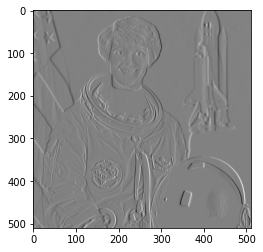

In [8]:
out_2 = torch.nn.functional.conv2d(img, single_kernel,groups=1)
print(out_2)
print(out_2.shape)
plt.imshow(out_2[0].permute(1,2,0), cmap = "gray")

tensor([[ 0.9882,  0.6039, -0.1647,  ..., -0.0471,  0.0353,  0.0706],
        [ 0.5804,  0.3961, -0.0431,  ..., -0.0431, -0.0118,  0.0627],
        [ 0.3137,  0.2667,  0.0196,  ..., -0.0275, -0.0353,  0.0431],
        ...,
        [ 0.0235,  0.0549,  0.0667,  ...,  0.5529,  0.0745,  0.0000],
        [ 0.0235,  0.0902,  0.1373,  ...,  0.7765,  0.0941,  0.0000],
        [ 0.0118,  0.1176,  0.2392,  ...,  1.1569,  0.4157,  0.0000]])


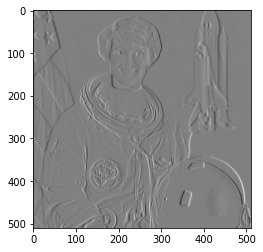

tensor([[ 0.9098,  0.5529, -0.1804,  ..., -0.0196,  0.0471,  0.0431],
        [ 0.5098,  0.3569, -0.0392,  ..., -0.0118,  0.0275,  0.0471],
        [ 0.2627,  0.2392,  0.0471,  ..., -0.0078, -0.0118,  0.0157],
        ...,
        [ 0.0078,  0.0353,  0.0980,  ...,  0.5020,  0.0706,  0.0000],
        [ 0.0431,  0.1020,  0.1490,  ...,  0.7451,  0.0941,  0.0000],
        [ 0.0667,  0.1490,  0.2196,  ...,  1.1176,  0.4157,  0.0000]])


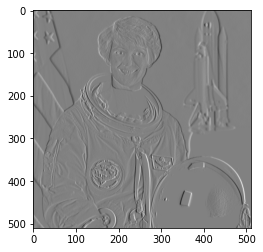

tensor([[ 6.7451e-01,  3.5294e-01, -5.8824e-02,  ..., -5.4902e-02,
          5.8824e-02,  1.0588e-01],
        [ 4.6667e-01,  2.8235e-01, -3.9216e-03,  ..., -6.2745e-02,
          2.3529e-02,  1.1373e-01],
        [ 2.7451e-01,  2.0784e-01, -5.9605e-08,  ..., -5.8824e-02,
         -1.1765e-02,  9.0196e-02],
        ...,
        [ 3.1373e-02,  6.6667e-02,  9.0196e-02,  ...,  3.7647e-01,
          5.4902e-02,  0.0000e+00],
        [ 3.9216e-02,  1.2157e-01,  1.7255e-01,  ...,  6.0784e-01,
          7.0588e-02,  3.9216e-03],
        [-1.9608e-02,  1.6078e-01,  3.2941e-01,  ...,  1.0118e+00,
          3.2941e-01,  7.8431e-03]])


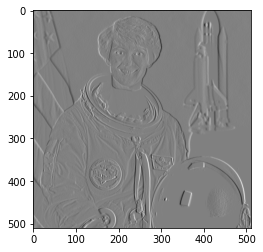

In [9]:
single_kernel2 = single_kernel.view(3,1,3,3)
out_3 = torch.nn.functional.conv2d(img, single_kernel2,groups=3)
for i in range(3):
    res = out_3[0][i]
    print(res)
    plt.imshow(res, cmap = "gray")
    plt.show()

In [13]:
## Let's try the conv2d with BRG image
img_bgr = skimage.data.astronaut()
R, G, B = img_bgr[:,:,0], img_bgr[:,:,1], img_bgr[:,:,2]
img_bgr = np.dstack((B,G,R))
#print(img_bgr)
img_bgr = torch.tensor(img_bgr).permute(2,0,1).float() 
img_bgr = normalize_img(img_bgr)
img_bgr = img_bgr.view(1, 3, 512, 512)

tensor([[ 6.7451e-01,  3.5294e-01, -5.8824e-02,  ..., -5.4902e-02,
          5.8824e-02,  1.0588e-01],
        [ 4.6667e-01,  2.8235e-01, -3.9216e-03,  ..., -6.2745e-02,
          2.3529e-02,  1.1373e-01],
        [ 2.7451e-01,  2.0784e-01, -5.9605e-08,  ..., -5.8824e-02,
         -1.1765e-02,  9.0196e-02],
        ...,
        [ 3.1373e-02,  6.6667e-02,  9.0196e-02,  ...,  3.7647e-01,
          5.4902e-02,  0.0000e+00],
        [ 3.9216e-02,  1.2157e-01,  1.7255e-01,  ...,  6.0784e-01,
          7.0588e-02,  3.9216e-03],
        [-1.9608e-02,  1.6078e-01,  3.2941e-01,  ...,  1.0118e+00,
          3.2941e-01,  7.8431e-03]])


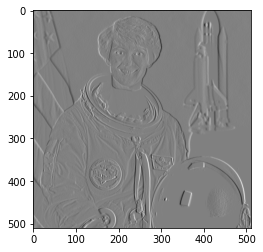

tensor([[ 0.9098,  0.5529, -0.1804,  ..., -0.0196,  0.0471,  0.0431],
        [ 0.5098,  0.3569, -0.0392,  ..., -0.0118,  0.0275,  0.0471],
        [ 0.2627,  0.2392,  0.0471,  ..., -0.0078, -0.0118,  0.0157],
        ...,
        [ 0.0078,  0.0353,  0.0980,  ...,  0.5020,  0.0706,  0.0000],
        [ 0.0431,  0.1020,  0.1490,  ...,  0.7451,  0.0941,  0.0000],
        [ 0.0667,  0.1490,  0.2196,  ...,  1.1176,  0.4157,  0.0000]])


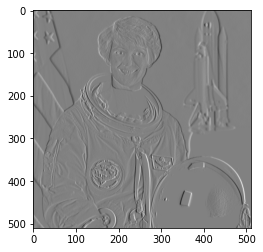

tensor([[ 0.9882,  0.6039, -0.1647,  ..., -0.0471,  0.0353,  0.0706],
        [ 0.5804,  0.3961, -0.0431,  ..., -0.0431, -0.0118,  0.0627],
        [ 0.3137,  0.2667,  0.0196,  ..., -0.0275, -0.0353,  0.0431],
        ...,
        [ 0.0235,  0.0549,  0.0667,  ...,  0.5529,  0.0745,  0.0000],
        [ 0.0235,  0.0902,  0.1373,  ...,  0.7765,  0.0941,  0.0000],
        [ 0.0118,  0.1176,  0.2392,  ...,  1.1569,  0.4157,  0.0000]])


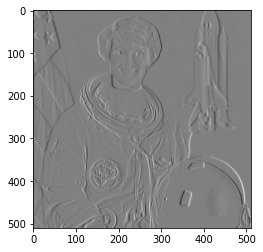

In [14]:
out_4 = torch.nn.functional.conv2d(img_bgr, single_kernel2,groups=3)
for i in range(3):
    res = out_4[0][i]
    print(res)
    plt.imshow(res, cmap = "gray")
    plt.show()

In [19]:
## Same kernel but with different image (reorganized of RGB channels)
out_5 = torch.nn.functional.conv2d(img_bgr, kernels_multi_features, groups=1)
print("Same kernel of kernels_multi_features, now convolved with BRG image:\n", out_5)

Same kernel of kernels_multi_features, now convolved with BRG image:
 tensor([[[[ 0.0471, -0.7529, -1.2431,  ...,  0.4510,  0.5647,  0.6196],
          [ 0.1765, -0.3020, -0.6275,  ...,  0.4549,  0.5451,  0.5922],
          [ 0.4745,  0.2353, -0.0196,  ...,  0.4667,  0.4941,  0.5647],
          ...,
          [ 0.7451,  0.8235,  0.8824,  ...,  0.4627,  0.1098,  0.0000],
          [ 0.7961,  0.9098,  1.0314,  ...,  0.2314, -0.0157, -0.0039],
          [ 0.7686,  0.9882,  1.1529,  ...,  0.4471,  0.0784,  0.0039]]]])


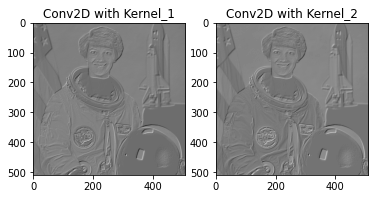

In [36]:
kernels_multi_feature2 = torch.zeros(3,3,3)
kernels_multi_feature2[0], kernels_multi_feature2[1], kernels_multi_feature2[2] = kernel3, kernel1, kernel2
kernels_multi_feature2 = kernels_multi_feature2.view(1, 3, 3, 3)

out_6 = torch.nn.functional.conv2d(img, kernels_multi_feature2, groups=1)
plt.figure(1)
plt.subplot(1,2,1)
plt.imshow(out_6[0].permute(1,2,0), cmap = "gray")
plt.title("Conv2D with Kernel_1")
plt.subplot(1,2,2)
plt.imshow(out_img[0].permute(1,2,0), cmap = "gray")
plt.title("Conv2D with Kernel_2")
plt.show()

# Conv3D

In [ ]:
img_3d = img.view(1,3,1,512,512)
single_kernel_3d = single_kernel.view(1,3,1,3,3)
out_img_3d = torch.nn.functional.conv3d(img_3d, single_kernel_3d, groups=1)
print("Conv3D output shape:",out_img_3d.shape)
print("\n",out_img_3d)

print("Check whether this is equalavent to Conv2d:\n", np.array_equal(out_img_3d[0], out_2))